<a href="https://colab.research.google.com/github/kimsangho611/DeepLearningZeroToAll-Practice/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.4.0


In [ ]:
!pip install tensorflow==1.15 # 1.15 버전 Tensorflow 설치

In [3]:
import tensorflow as tf
tf.__version__

'1.15.0'

# Hello TensorFlow!

In [ ]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, Tensorflow!")

# start a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello)) # b' is indicates bytes literals

b'Hello, Tensorflow!'


# Tensors Shape

In [6]:
a = 3 # a rank 0 tensor : this is a scalar with shape []
b = [1., 2., 3.] # rank 1 [3]
c = [[1., 2., 3.], [4., 5., 6.]] # rank 2 (2,3)
d = [[[1., 2., 3.]], [[7., 8., 9.]]] # rank 3 (2, 1, 3)

print("the shape of a : ", tf.shape(a))
print("the shape of b : ", tf.shape(b))
print("the shape of c : ", tf.shape(c))
print("the shape of d : ", tf.shape(d))

the shape of a :  Tensor("Shape_1:0", shape=(0,), dtype=int32)
the shape of b :  Tensor("Shape_2:0", shape=(1,), dtype=int32)
the shape of c :  Tensor("Shape_3:0", shape=(2,), dtype=int32)
the shape of d :  Tensor("Shape_4:0", shape=(3,), dtype=int32)


# Comoutational Graph

In [ ]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

In [ ]:
print("node1 : ", node1, "node2 : ", node2) # 그래프의 한 요소임을 알려줌
print("node3 : ", node3)

node1 :  Tensor("Const_6:0", shape=(), dtype=float32) node2 :  Tensor("Const_7:0", shape=(), dtype=float32)
node3 :  Tensor("Add_3:0", shape=(), dtype=float32)


In [ ]:
sess = tf.Session() # node를 실행하기 위해서 
print("sess.run(node1, node2) : ", sess.run([node1, node2]))
print("sess.run(node3) : ", sess.run(node3))

sess.run(node1, node2) :  [3.0, 4.0]
sess.run(node3) :  7.0


# PlaceHolder

In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provide a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict = {a:3, b:4.5}))
print(sess.run(adder_node, feed_dict = {a: [1, 3], b: [2,4]}))

7.5
[3. 7.]


In [ ]:
add_and_triple = adder_node * 3
print(sess.run(add_and_triple, feed_dict={a:3, b:4.5}))

22.5


=======================================================================================================

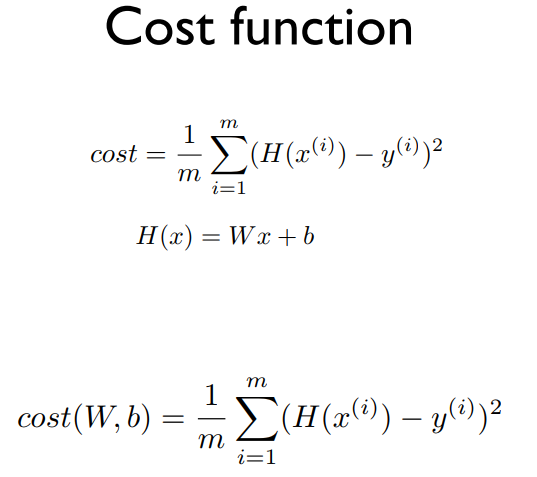
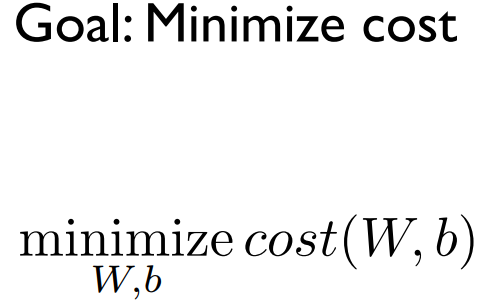

In [ ]:
tf.set_random_seed(777)

In [ ]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

In [ ]:
# TensorFlow variable (trainable variable)
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Our Hypothesis H(x) = W * X + b
hypothesis = W * x_train + b

In [ ]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # reduce_mean 함수는 평균을 구해주는 함수

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

In [ ]:
# Lanch the graph in a session
with tf.Session() as sess : 
    # Initialize global variable in the graph 
    sess.run(tf.global_variables_initializer()) # TensorFlow variable을 쓸 때는 반드시 초기화를 해야함

    # Fit in line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b])

        if step % 100 == 0:
            print(step, cost_val, W_val, b_val)

0 39.759842 [-1.7834473] [0.4365785]
100 0.17252481 [0.51872665] [1.0940013]
200 0.10660986 [0.62168866] [0.8599906]
300 0.06587847 [0.7026127] [0.6760312]
400 0.040708877 [0.7662266] [0.53142214]
500 0.025155613 [0.8162327] [0.41774613]
600 0.015544671 [0.85554206] [0.32838663]
700 0.009605657 [0.8864429] [0.25814193]
800 0.0059357085 [0.9107338] [0.20292306]
900 0.0036679066 [0.9298286] [0.15951604]
1000 0.0022665514 [0.9448388] [0.12539423]
1100 0.0014005932 [0.9566383] [0.0985713]
1200 0.00086547906 [0.9659138] [0.07748596]
1300 0.0005348128 [0.97320515] [0.06091099]
1400 0.00033048334 [0.97893685] [0.04788166]
1500 0.0002042174 [0.98344237] [0.0376393]
1600 0.00012619342 [0.9869842] [0.02958794]
1700 7.798051e-05 [0.98976845] [0.02325888]
1800 4.818587e-05 [0.9919571] [0.01828338]
1900 2.977675e-05 [0.99367756] [0.01437239]
2000 1.8400391e-05 [0.9950299] [0.01129812]


## Linear regression Using placeholder

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)

In [ ]:
# Try to find values for W and b to compute y
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Set placeholder
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

# Our Hypothesis
hypothesis = X * W + b

In [ ]:
# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
# Lanch the graph in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Fit in line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={X: [1, 2, 3], Y:[1, 2, 3]})

        if step % 100 == 0:
            print(step, cost_val, W_val, b_val)

    print("====================================================")
    # Test out model
    print(sess.run(hypothesis, feed_dict={X: [5]}))
    print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
    print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

    print("====================================================")
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={X: [1,2,3,4,5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})

        if step % 100 == 0: print(step, cost_val, W_val, b_val)

    print("====================================================")
    print(sess.run(hypothesis, feed_dict={X: [5]}))
    print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
    print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

=======================================================================================================

# Minimize cost using gradient decent algorithm

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for ilnear model X * W
hypothesis = W * X

# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variable for plotting cost function
W_history = []
cost_history = []

In [ ]:
# Lanch the graph in a session
with tf.Session() as sess:
    for i in range(-30, 50):
        curr_w = i * 0.1 # -3 ~ 5까지 0.1만큼 움직이면서
        curr_cost = sess.run(cost, feed_dict={W: curr_w})

        W_history.append(curr_w)
        cost_history.append(curr_cost)

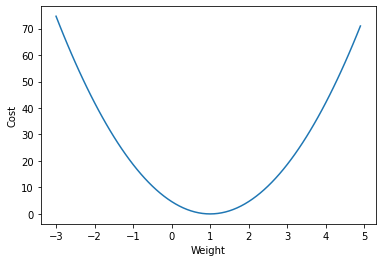

In [ ]:
plt.plot(W_history, cost_history) # Cost function 그림
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.show()

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)

In [ ]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

# weight
W = tf.Variable(tf.random_normal([1]), name = "weight")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis
hypothesis = W * X

# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [ ]:
# minimize : Gradient Desent using derivarive
learning_rate = 0.1 # Set 알파
gradient = tf.reduce_mean((W * X - Y) * X) # get 미분 값 
descent = W - learning_rate * gradient # Calculate gradient
update = W.assign(descent) # update weight

In [ ]:
with tf.Session() as sess: # open session
    sess.run(tf.global_variables_initializer())

    for step in range(30) :
        _, cost_val, W_val = sess.run([update, cost, W], feed_dict={X:x_data, Y:y_data})
        print(step, cost_val, W_val)

=======================================================================================================

# Multivariable linear regression

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [ ]:
# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(4001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y:y_data})
    if step % 200 == 0: print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

# Multivariable linear regerssion using matrix

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape = [None, 3]) # the shape of X is (n, 3)
Y = tf.placeholder(tf.float32, shape = [None, 1]) # the shape of Y is (n. 1)

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = "bias")

hypothesis = tf.matmul(X, W) + b

In [ ]:
# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y:y_data})
    if step % 100 == 0: print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

# Multivariable linear regerssion using file data

In [106]:
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive, files
tf.set_random_seed(777)

In [107]:
uploaded = files.upload()

Saving data_01_test_score.csv to data_01_test_score.csv


In [109]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
xy = np.loadtxt('/content/drive/My Drive/모두의 딥러닝/data_01_test_score.csv', delimiter=',', dtype = np.float32)

In [ ]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data, "\nx_data shape : ", x_data.shape)
print(y_data, "\ny_data shape : ", y_data.shape)

In [118]:
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

# cost/lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _  = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0 : print(step, "Cost : ", cost_val, "\nPrediction\n", hy_val)

In [125]:
print('Your score will be ', sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))
print('Other score will be ', sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90,100,80]]}))

Your score will be  [[179.6284]]
Other score will be  [[187.34651]
 [176.60081]]


# Multivariable linear regerssion using Queue runners

In [126]:
import tensorflow as tf
tf.set_random_seed(777)

filename_queue = tf.train.string_input_producer(
    ['data_01_test_score.csv'], shuffle = False, name = 'filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.


In [127]:
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

In [129]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [130]:
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess = sess, coord = coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_batch, Y:y_batch})
    if step % 1000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
    
coord.request_stop()
coord.join(threads)

In [133]:
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[188.83708]]
Other scores will be  [[185.41235]
 [173.48064]]


=======================================================================================================

# Logistic regression

In [134]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [141]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(cost)

In [142]:
predicted = tf.cast(hypothesis >= 0.5, dtype = tf.float32) # cast란 값을 dtype으로 변수의 type을 변경해줌
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001) :
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
    print('=================================================')
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y:y_data})
    print("\nHypothesis : ", h, "\nCorrect : ", c, "\nAccuracy : ", a)

# Logistic regression using diabetes data

In [146]:
files.upload()

Saving data_03_diabetes.csv to data_03_diabetes.csv


{'data_03_diabetes.csv': b'-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0\r\n-0.882353,-0.145729,0.0819672,-0.414141,0,-0.207153,-0.766866,-0.666667,1\r\n-0.0588235,0.839196,0.0491803,0,0,-0.305514,-0.492741,-0.633333,0\r\n-0.882353,-0.105528,0.0819672,-0.535354,-0.777778,-0.162444,-0.923997,0,1\r\n0,0.376884,-0.344262,-0.292929,-0.602837,0.28465,0.887276,-0.6,0\r\n-0.411765,0.165829,0.213115,0,0,-0.23696,-0.894962,-0.7,1\r\n-0.647059,-0.21608,-0.180328,-0.353535,-0.791962,-0.0760059,-0.854825,-0.833333,0\r\n0.176471,0.155779,0,0,0,0.052161,-0.952178,-0.733333,1\r\n-0.764706,0.979899,0.147541,-0.0909091,0.283688,-0.0909091,-0.931682,0.0666667,0\r\n-0.0588235,0.256281,0.57377,0,0,0,-0.868488,0.1,0\r\n-0.529412,0.105528,0.508197,0,0,0.120715,-0.903501,-0.7,1\r\n0.176471,0.688442,0.213115,0,0,0.132638,-0.608027,-0.566667,0\r\n0.176471,0.396985,0.311475,0,0,-0.19225,0.163962,0.2,1\r\n-0.882353,0.899497,-0.0163934,-0.535354,1,-0.102832,-0.726729,0.266667,0\r\n-0.17

In [148]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('/content/drive/My Drive/모두의 딥러닝/data_03_diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

(759, 8) (759, 1)


In [166]:
X = tf.placeholder(tf.float32, shape = [None, 8])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.07).minimize(cost)

In [167]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [168]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    print('====================================================')
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: ", h[-5:], "\nCorrect (Y): ....", c[-5:], "\nAccuracy: ", a)

0 0.792574
1000 0.49426106
2000 0.4762565
3000 0.47324347
4000 0.47239164
5000 0.4720545
6000 0.4718897
7000 0.4717996
8000 0.4717478
9000 0.4717171
10000 0.47169873

Hypothesis:  [[0.7610675 ]
 [0.71660364]
 [0.8643945 ]
 [0.7333016 ]
 [0.92872393]] 
Correct (Y): .... [[1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.770751


=======================================================================================================

# SoftMax Classification (Multinomial classification)

In [10]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_class = 3;

W = tf.Variable(tf.random_normal([4, nb_class], name = "weight"))
b = tf.Variable(tf.random_normal([nb_class]), name = "bias")

# softmax
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [11]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict = {X:x_data, Y:y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict = {X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.arg_max(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict = {X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.arg_max(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict = {X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.arg_max(all, 1)))

0 3.6577764
1000 0.25661126
2000 0.16052689
3000 0.117736496
4000 0.09260933
5000 0.07616837
6000 0.06460757
7000 0.056050442
8000 0.049469024
9000 0.04425421
10000 0.040022988
--------------
[[3.0140955e-06 9.9999702e-01 4.0909136e-08]] [1]
--------------
[[9.9211580e-01 7.5983033e-03 2.8591207e-04]] [0]
--------------
[[7.3695964e-16 6.3500499e-07 9.9999940e-01]] [2]
--------------
[[3.0140955e-06 9.9999702e-01 4.0908979e-08]
 [9.9211580e-01 7.5983177e-03 2.8591263e-04]
 [7.3695964e-16 6.3500499e-07 9.9999940e-01]] [1 0 2]


# Fency Softmax Classifier using zoo data



In [16]:
from google.colab import drive, files

In [20]:
files.upload()

Saving data-04-zoo.csv to data-04-zoo (1).csv


{'data-04-zoo.csv': b'1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0\r\n1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0\r\n0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3\r\n1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0\r\n1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0\r\n1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0\r\n1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,0\r\n0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,3\r\n0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3\r\n1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,0\r\n1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0\r\n0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,1\r\n0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3\r\n0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,6\r\n0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,6\r\n0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,6\r\n0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,1\r\n1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0\r\n0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,3\r\n0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0\r\n0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,1\r\n0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,1\r\n1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0\r\n0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,1\r\n0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,5\r\n0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,4\r\n0,0,1,0,0,1,1,1,

In [31]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

xy = np.loadtxt('/content/drive/My Drive/모두의 딥러닝/data-04-zoo.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [38]:
print(x_data.shape, y_data.shape)

(101, 16) (101, 1)


In [43]:
nb_class = 7

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])

# one-hot encoding을 하면 rank가 1 증가함 따라서 원래 형태로 바꾸어줘야됨
Y_one_hot = tf.one_hot(Y, nb_class) # one-hot encoding 실행
print("one_hot : ", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_class]) # 형태 재구성
print("reshape one_hot : ", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_class]), name="weight")
b = tf.Variable(tf.random_normal([nb_class]), name = "bias")

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# version 1
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = Y_one_hot))

# version 2
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf.stop_gradient([Y_one_hot]))) #stop_gradient함수는 학습하는 부분을 나누어 학습하고자 할 때 사용한다.
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.arg_max(hypothesis, 1) # 가설함수의 값에서 가장 큰 값을 얻음
correct_prediction = tf.equal(prediction, tf.arg_max(Y_one_hot, 1)) # 위에서 얻은 값과 실제 값이 같은지 확인 (1은 열을 기준으로 확인)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # 앞서 얻은 모든 예측 값을 더해서 평균을 계산해 정확도를 계산

one_hot :  Tensor("one_hot_4:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot :  Tensor("Reshape_4:0", shape=(?, 7), dtype=float32)


In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([train, cost, accuracy], feed_dict={X:x_data, Y:y_data})
        if step % 500 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    pred = sess.run(prediction, feed_dict={X:x_data})
    for p, y in zip(pred, y_data.flatten()): # flatten함수는 n차원으로 이루어진 데이터를 직렬화한다.
        print("[{}] Prediction : {} True Y : {}".format(p == int(y), p, int(y)))

=======================================================================================================

# Learning rate and Evaluation
- learning rate에 따라 가중치의 변화와 과적합을 확인해본다.

In [58]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1], # one-hot encoding so Our model use softmax
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder(tf.float32, [None, 3])
Y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random_normal([3, 3]), name = 'weight')
b = tf.Variable(tf.random_normal([3]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

prediction = tf.arg_max(hypothesis, 1) # 예상 결과를 얻음
is_correct = tf.equal(prediction, tf.arg_max(Y, 1)) # 예상 결과가 실제와 동일한지 확인
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 예측 결과와 실제 결과를 비교해 평균을 내 예측 정확도를 계산

In [59]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        cost_val,W_val, _ = sess.run([cost, W, train], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val, W_val)

    print("Prediction : ", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 6.0261106 [[-0.71623707  1.3625672  -0.47856766]
 [-0.45875007  0.24063832  0.83187234]
 [ 1.862092    0.83042866 -2.0092397 ]]
500 3.2745075 [[-10.74248      4.615052     6.29519   ]
 [  0.33790863  -0.18673766   0.4625929 ]
 [  3.2946732   -0.07047409  -2.5409157 ]]
1000 0.7174748 [[-16.937702     6.1262703   10.979184  ]
 [ -0.256973     0.95024425  -0.07950542]
 [  5.918805    -1.0636344   -4.171891  ]]
1500 0.0563428 [[-18.672802     5.383222    13.45734   ]
 [  0.30398613   0.2762802    0.03350021]
 [  6.825936    -1.0841972   -5.0584574 ]]
2000 0.042627208 [[-1.8850306e+01  4.6077857e+00  1.4410220e+01]
 [ 3.4806803e-01  2.5523037e-01  1.0469267e-02]
 [ 6.8889728e+00 -7.3522681e-01 -5.4704733e+00]]
Prediction :  [2 2 2]
Accuracy :  1.0


# Linear regerssion using non regularization data
- 일반화되지 않은 데이터를 사용해 모델을 학습해본 후 예측값과 비용을 확인해본다.

In [61]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(11):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})

    if step % 2 == 0:
        print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

# Linear regerssion using non regularization data
- 앞서 확인한 문제를 일반화하여 다시 모델을 구축해본다.

In [74]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

def min_max_scaler(data):
    numerator = data - np.min(data, 0) # 행을 기준(즉 같은 열에서 다른 행까리)으로 가장 작은 값을 빼준다.
    denominator = np.max(data ,0) - np.min(data ,0)
    return numerator / (denominator + 1e-7) # 1e-7은 0으로 나뉘는 것을 방지하기 위한 설정

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

# very important. It does not work without it.
xy = min_max_scaler(xy)
print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [88]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, cost_val, hy_val = sess.run([train, cost, hypothesis], feed_dict={X:x_data, Y:y_data})
        if step % 10 == 0:
            print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

=======================================================================================================

# Mnist example

In [135]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
nb_class = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_class])

W = tf.Variable(tf.random_normal([784, nb_class]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_class]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=1.2).minimize(cost)

correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
num_epochs = 20
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        print("Epoch : {:04d}, Cost : {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finish")

    print("Accuracy : ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    print("======================================================")

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.arg_max(mnist.test.labels[r : r + 1], 1)))
    print("Prediction : ", sess.run(tf.arg_max(hypothesis, 1), feed_dict={X:mnist.test.images[r : r + 1]}))

    # interpolation이란 보간이라는 뜻으로 화면의 해상도와 이미지의 해상도가 다를 경우에 사용된다.
    # 이미지를 압축했다가 다시 압축을 풀때 주로 사용됨
    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap = "Greys", interpolation="nearest")
    plt.show()

# Tensor Manipulation

In [138]:
import tensorflow as tf
import numpy as np
import pprint # 임의의 파이썬 데이터 구조를 인터프리터의 입력으로 사용할 수 있는 형태를 지원하는 라이브러리
tf.set_random_seed(777)

pp = pprint.PrettyPrinter(indent = 4) # indent의 경우 들여쓰기를 위한 칸 수

# tf.Session()을 사용하는 경우 자동으로 세션을 할당하지 않기 때문에 주로 with문과 함께 쓰인다.
sess = tf.InteractiveSession() # 이는 자동으로 터미널에 default session을 할당한다.

### Simple Arrary

In [139]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

array([0., 1., 2., 3., 4., 5., 6.])
1
(7,)
0.0 1.0 6.0
[2. 3. 4.] [4. 5.]
[0. 1.] [3. 4. 5. 6.]


### 2D Array

In [140]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)


### Shape, Rank, Axis
- 축의 경우 axis = -1을  하면 제일 안쪽 축을 의미

In [141]:
t = tf.constant([1,2,3,4])
tf.shape(t).eval()

array([4], dtype=int32)

In [142]:
t = tf.constant([[1,2],
                 [3,4]])
tf.shape(t).eval()

array([2, 2], dtype=int32)

In [144]:
# n 차원을 확인할 때는 가장 안쪽의 차원부터 확인하면 쉽게 차원을 확인할 수 있음
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],[[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]) 
tf.shape(t).eval()

array([1, 2, 3, 4], dtype=int32)

In [146]:
[
    [
        [
            [1,2,3,4], 
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
]

[[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
  [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]

### Matmul VS multiply

In [147]:
# [3, 3,] * [[2],
#            [2]]
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
tf.matmul(matrix1, matrix2).eval()

array([[12.]], dtype=float32)

In [149]:
(matrix1*matrix2).eval() # 이는 일반적인 행렬 곱셈이 아니라 Broadcasting되어 원소끼리의 곱이 계산된 것

array([[6., 6.],
       [6., 6.]], dtype=float32)

### Watch out broadcasting

In [150]:
# Broadcasting은 Tensor의 차원을 맞춰주는 역할을 함
# [3, 3] + [[2], 였던 것이 [[3, 3], + [[2, 2],  로 변경됨
#           [2]]            [3, 3]]    [2, 2]] 
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
(matrix1+matrix2).eval()

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [151]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
(matrix1+matrix2).eval()

array([[5., 5.]], dtype=float32)

### Random values for variable initialization

In [154]:
tf.random_normal([3]).eval() # 정규분포로 부터 받은 Tensor의 차원만큼 난수를 반환한다.

array([-0.8951637 ,  0.78747755, -0.12193232], dtype=float32)

In [155]:
tf.random_uniform([2]).eval() # 균등 분포로부터 받은 Tensor의 차원만큼 난수를 반환한다. 
# 이때 [minval, maxval) 사이의 균등한 난수 값을 반환

array([0.57820594, 0.71260226], dtype=float32)

In [156]:
tf.random_uniform([2, 3]).eval()

array([[0.3132081 , 0.34272933, 0.4011165 ],
       [0.37095654, 0.9770187 , 0.7233596 ]], dtype=float32)

### Reduced Mean/Sum

In [159]:
tf.reduce_mean([1, 2], axis = 0).eval()

1

In [162]:
x = [[1., 2.],
     [3., 4.]]

tf.reduce_mean(x).eval() # 축의 설정이 없으면 전체에 대한 값을 구함

2.5

In [163]:
tf.reduce_mean(x, axis=0).eval()

array([2., 3.], dtype=float32)

In [164]:
tf.reduce_mean(x, axis=1).eval()

array([1.5, 3.5], dtype=float32)

In [165]:
tf.reduce_mean(x, axis=-1).eval()

array([1.5, 3.5], dtype=float32)

In [166]:
tf.reduce_sum(x).eval()

10.0

In [167]:
tf.reduce_sum(x, axis=0).eval()

array([4., 6.], dtype=float32)

In [168]:
tf.reduce_sum(x, axis=-1).eval()

array([3., 7.], dtype=float32)

In [169]:
tf.reduce_mean(tf.reduce_sum(x, axis=-1)).eval()

5.0

### Argmax with axis

In [170]:
# argmax는 축을 기준으로 큰 값의 위치(index)를 구해줌
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis=0).eval()

array([1, 0, 0])

In [171]:
tf.argmax(x, axis=1).eval()

array([2, 0])

In [172]:
tf.argmax(x, axis=-1).eval()

array([2, 0])

### Reshape, Squeeze, expand_dims

In [173]:
# reshape에서 가장 마지막 축은 통상적으로 변경하지 않고 나머지를 조정한다.
t = np.array([[[0, 1, 2], 
               [3, 4, 5]],
              
              [[6, 7, 8], 
               [9, 10, 11]]])
t.shape

(2, 2, 3)

In [174]:
tf.reshape(t, shape=[-1, 3]).eval()

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [175]:
tf.reshape(t, shape=[-1, 1, 3]).eval()

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])

In [177]:
tf.squeeze([[0], [1], [2]]).eval() # Tensor에서 크기가 1인 차원을 없애줌

array([0, 1, 2], dtype=int32)

In [185]:
# 이는 크기가 1인 차원을 삽입한다.
tf.expand_dims([0, 1, 2], 1).eval() # -1-input.dims() <= dim <= input.dims()안에서 확장가능

array([[0],
       [1],
       [2]], dtype=int32)

### One hot

In [189]:
# One hot encoding을 수행하면 차원이 1개 늘어남
tf.one_hot([[0], [1], [2], [0]], depth=3).eval() # depth인자는 encoding의 길이를 결정 따라서 이는 Label의 수만큼 지정해주면 됨

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)

In [190]:
t = tf.one_hot([[0], [1], [2], [0]], depth=3)
tf.reshape(t, shape=[-1, 3]).eval()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### Casting

In [192]:
# casting은 데이터를 원하는 type으로 변경함
tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32).eval()

array([1, 2, 3, 4], dtype=int32)

In [193]:
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32).eval()

array([1, 0, 1, 0], dtype=int32)

### Stack

In [194]:
# stack은 축을 기준으로 stack을 한다. 축을 설정하지 않으면 변수의 순서대로 stack에 쌓인다.
x = [1, 4]
y = [2, 5]
z = [3, 6]

# Pack along first dim.
tf.stack([x, y, z]).eval()

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)

In [195]:
tf.stack([x, y, z], axis=1).eval()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

### Ones like and Zeros like

In [197]:
# 이는 인자로 받은 데이터의 차원과 똑같은 크기에 1 or 0을 삽입하여 생성한다.
x = [[0, 1, 2],
     [2, 1, 0]]

tf.ones_like(x).eval()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [198]:
tf.zeros_like(x).eval()

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

### Zip

In [200]:
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)

1 4
2 5
3 6


In [202]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4 7
2 5 8
3 6 9


### Transpose

In [203]:
t = np.array([[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10, 11]]])
pp.pprint(t.shape)
pp.pprint(t)

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


In [209]:
t1 = tf.transpose(t, [1, 0, 2]) # perm은 해당 Tensor의 차원만큼 생성하여 index 위치를 변경하면 된다. 이는 Permutation을 사용한다.
pp.pprint(sess.run(t1).shape)
pp.pprint(sess.run(t1))

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 6,  7,  8]],

       [[ 3,  4,  5],
        [ 9, 10, 11]]])


In [208]:
t2 = tf.transpose(t, [1, 2, 0])
pp.pprint(sess.run(t2).shape)
pp.pprint(sess.run(t2))

(2, 3, 2)
array([[[ 0,  6],
        [ 1,  7],
        [ 2,  8]],

       [[ 3,  9],
        [ 4, 10],
        [ 5, 11]]])


In [210]:
t = tf.transpose(t2, [2, 0, 1])
pp.pprint(sess.run(t).shape)
pp.pprint(sess.run(t))

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])
